In [18]:
# Machine Learning Online Class
#  Exercise 7 | Principle Component Analysis and K-Means Clustering
#
#  Instructions
#  ------------
#
#  This file contains code that helps you get started on the
#  exercise. You will need to complete the following functions:
#
#     pca.m
#     projectData.m
#     recoverData.m
#     computeCentroids.m
#     findClosestCentroids.m
#     kMeansInitCentroids.m
#
#  For this exercise, you will not need to change any code in this file,
#  or any other files other than those mentioned above.
#

# Initialization
import numpy as np
import scipy.io as scio
import matplotlib.pyplot as plt

In [13]:
def findClosestCentroids(X, centroids):
    #FINDCLOSESTCENTROIDS computes the centroid memberships for every example
    #   idx = FINDCLOSESTCENTROIDS (X, centroids) returns the closest centroids
    #   in idx for a dataset X where each row is a single example. idx = m x 1 
    #   vector of centroid assignments (i.e. each entry in range [1..K])
    #

    # Set K
    K = len(centroids)

    # You need to return the following variables correctly.
    idx = np.zeros((len(X), 1))

    # ====================== YOUR CODE HERE ======================
    # Instructions: Go over every example, find its closest centroid, and store
    #               the index inside idx at the appropriate location.
    #               Concretely, idx(i) should contain the index of the centroid
    #               closest to example i. Hence, it should be a value in the 
    #               range 1..K
    #
    # Note: You can use a for-loop over the examples to compute this.
    #
    '''for i in range(len(X)):
        idx[i] = np.argmin([np.linalg.norm(X[i]-cent)**2 for cent in centroids])'''
    #no loop
    idx = np.array([np.argmin([np.linalg.norm(x-cent)**2 for cent in centroids]) for x in X]).reshape(-1,1)
    # =============================================================

    return idx

# 1. 找到最近的质心点

In [14]:
# ================= Part 1: Find Closest Centroids ====================
#  To help you implement K-Means, we have divided the learning algorithm 
#  into two functions -- findClosestCentroids and computeCentroids. In this
#  part, you should complete the code in the findClosestCentroids function. 
#
print('Finding closest centroids.\n\n');

# Load an example dataset that we will be using
data = scio.loadmat('ex7data2.mat');
X = data['X']

# Select an initial set of centroids
K = 3; # 3 Centroids
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

# Find the closest centroids for the examples using the
# initial_centroids
idx = findClosestCentroids(X, initial_centroids);

print('Closest centroids for the first 3 examples: \n')
print(idx[0:3])
print('\n(the closest centroids should be 0, 2, 1 respectively)\n');

Finding closest centroids.


Closest centroids for the first 3 examples: 

[[0]
 [2]
 [1]]

(the closest centroids should be 0, 2, 1 respectively)



test case

In [56]:
X_tc = np.reshape(np.sin(range(1,51,1)), (10, 5),order='F');
cent = X_tc[6:10,:]
idx_tc = findClosestCentroids(X_tc, cent)

In [57]:
idx_tc

array([[0],
       [1],
       [2],
       [3],
       [3],
       [0],
       [0],
       [1],
       [2],
       [3]], dtype=int64)

和测试用例预期结果一致

# 2. 计算平均值

In [15]:
def computeCentroids(X, idx, K):
    #COMPUTECENTROIDS returns the new centroids by computing the means of the 
    #data points assigned to each centroid.
    #   centroids = COMPUTECENTROIDS(X, idx, K) returns the new centroids by 
    #   computing the means of the data points assigned to each centroid. It is
    #   given a dataset X where each row is a single data point, a vector
    #   idx of centroid assignments (i.e. each entry in range [1..K]) for each
    #   example, and K, the number of centroids. You should return a matrix
    #   centroids, where each row of centroids is the mean of the data points
    #   assigned to it.
    #

    # Useful variables
    m, n = X.shape

    # You need to return the following variables correctly.
    centroids = np.zeros((K, n))


    # ====================== YOUR CODE HERE ======================
    # Instructions: Go over every centroid and compute mean of all points that
    #               belong to it. Concretely, the row vector centroids(i, :)
    #               should contain the mean of the data points assigned to
    #               centroid i.
    #
    # Note: You can use a for-loop over the centroids to compute this.
    #
    '''for k in range(K):
        centroids[k] = np.average(X[(idx==k).ravel()],axis=0)'''
    # no loop
    centroids = np.array([np.average(X[(idx==k).ravel()],axis=0) for k in range(K)])
    # =============================================================

    return centroids

测试用例

In [72]:
X_test = np.reshape(range(1,25,1),(8,3),order='F');
computeCentroids(X_test, np.array([0, 0, 2, 2, 3, 3, 1, 1]).reshape(-1,1),4)

array([[  1.5,   9.5,  17.5],
       [  7.5,  15.5,  23.5],
       [  3.5,  11.5,  19.5],
       [  5.5,  13.5,  21.5]])

测试通过

In [16]:
# ===================== Part 2: Compute Means =========================
#  After implementing the closest centroids function, you should now
#  complete the computeCentroids function.
#
print('\nComputing centroids means.\n\n');

#  Compute means based on the closest centroids found in the previous part.
centroids = computeCentroids(X, idx, K);

print('Centroids computed after initial finding of closest centroids: \n')
print(centroids);
print('\n(the centroids should be\n');
print('   [ 2.428301 3.157924 ]\n');
print('   [ 5.813503 2.633656 ]\n');
print('   [ 7.119387 3.616684 ]\n\n');


Computing centroids means.


Centroids computed after initial finding of closest centroids: 

[[ 2.42830111  3.15792418]
 [ 5.81350331  2.63365645]
 [ 7.11938687  3.6166844 ]]

(the centroids should be

   [ 2.428301 3.157924 ]

   [ 5.813503 2.633656 ]

   [ 7.119387 3.616684 ]




结果一致

# 3. K-Means聚类

针对仅有两列的数据

In [45]:
def plotDataPoints(X, idx, K):
    #PLOTDATAPOINTS plots data points in X, coloring them so that those with the same
    #index assignments in idx have the same color
    #   PLOTDATAPOINTS(X, idx, K) plots data points in X, coloring them so that those 
    #   with the same index assignments in idx have the same color

    # 忽略原MATLAB程序的实现细节
    
    # Plot the data
    plt.scatter(X[:,0], X[:,1], s=15, c=idx.ravel());
    #plt.show()
    # not using K?

In [46]:
def drawLine(p1, p2):
    #DRAWLINE Draws a line from point p1 to point p2
    #   DRAWLINE(p1, p2) Draws a line from point p1 to point p2 and holds the
    #   current figure

    plt.plot([p1[0], p2[0]], [p1[1], p2[1]])

In [47]:
def plotProgresskMeans(X, centroids, previous, idx, K, i):
    #PLOTPROGRESSKMEANS is a helper function that displays the progress of 
    #k-Means as it is running. It is intended for use only with 2D data.
    #   PLOTPROGRESSKMEANS(X, centroids, previous, idx, K, i) plots the data
    #   points with colors assigned to each centroid. With the previous
    #   centroids, it also plots a line between the previous locations and
    #   current locations of the centroids.
    #

    # Plot the examples
    plotDataPoints(X, idx, K);

    # Plot the centroids as black x's
    plt.plot(centroids[:,0].ravel(), centroids[:,1].ravel(), 'x', \
         markeredgecolor='k', \
         markersize=10, linewidth=3);

    # Plot the history of the centroids with lines
    for j in range(len(centroids)):
        drawLine(centroids[j, :], previous[j, :])
    

    # Title
    plt.title('Iteration number %d'%i)
    
    plt.show()

算法中仅按迭代次数终止，没有判断收敛

In [54]:
def runkMeans(X, initial_centroids, max_iters, plot_progress = False):
    #RUNKMEANS runs the K-Means algorithm on data matrix X, where each row of X
    #is a single example
    #   [centroids, idx] = RUNKMEANS(X, initial_centroids, max_iters, ...
    #   plot_progress) runs the K-Means algorithm on data matrix X, where each 
    #   row of X is a single example. It uses initial_centroids used as the
    #   initial centroids. max_iters specifies the total number of interactions 
    #   of K-Means to execute. plot_progress is a true/false flag that 
    #   indicates if the function should also plot its progress as the 
    #   learning happens. This is set to false by default. runkMeans returns 
    #   centroids, a Kxn matrix of the computed centroids and idx, a m x 1 
    #   vector of centroid assignments (i.e. each entry in range [1..K])
    #

    # Initialize values
    m, n = X.shape
    K = len(initial_centroids)
    centroids = initial_centroids;
    previous_centroids = centroids;
    idx = np.zeros((m, 1))

    # Run K-Means
    for i in range(1,max_iters+1):

        # Output progress
        print('K-Means iteration %d/%d...\n'%(i, max_iters))

        # For each example in X, assign it to the closest centroid
        idx = findClosestCentroids(X, centroids)
        
        #第一个迭代，质心没有发生位移，因此是在更新质心前输出图像
        # Optionally, plot progress here
        if plot_progress:
            plotProgresskMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids;
        
        # Given the memberships, compute new centroids
        centroids = computeCentroids(X, idx, K)
    
    return centroids, idx


Running K-Means clustering on example dataset.


K-Means iteration 1/10...



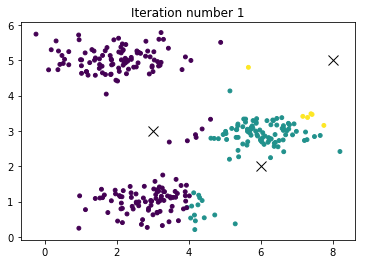

K-Means iteration 2/10...



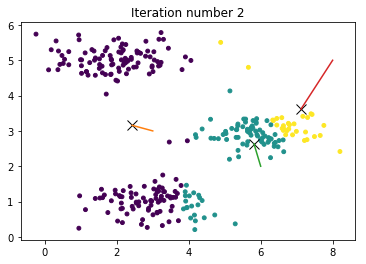

K-Means iteration 3/10...



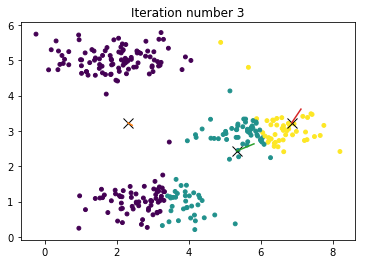

K-Means iteration 4/10...



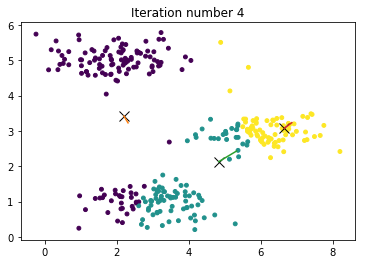

K-Means iteration 5/10...



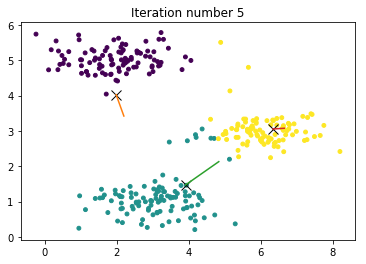

K-Means iteration 6/10...



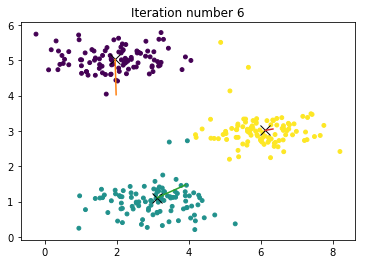

K-Means iteration 7/10...



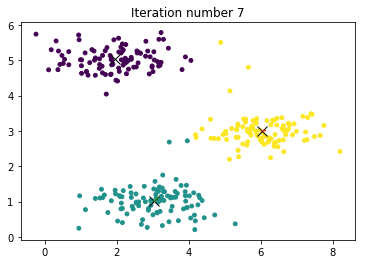

K-Means iteration 8/10...



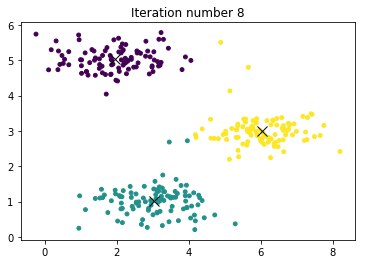

K-Means iteration 9/10...



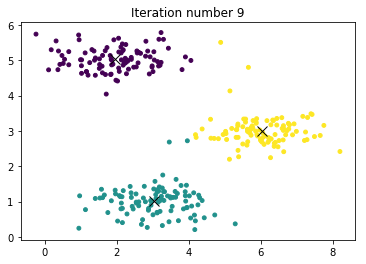

K-Means iteration 10/10...



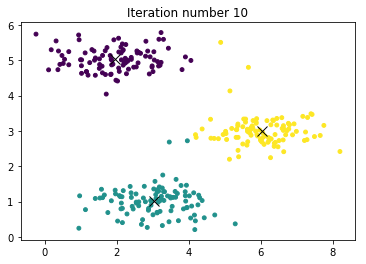


K-Means Done.




In [55]:
# =================== Part 3: K-Means Clustering ======================
#  After you have completed the two functions computeCentroids and
#  findClosestCentroids, you have all the necessary pieces to run the
#  kMeans algorithm. In this part, you will run the K-Means algorithm on
#  the example dataset we have provided. 
#
print('\nRunning K-Means clustering on example dataset.\n\n');

# Load an example dataset
#load('ex7data2.mat');

# Settings for running K-Means
K = 3;
max_iters = 10;

# For consistency, here we set centroids to specific values
# but in practice you want to generate them automatically, such as by
# settings them to be random examples (as can be seen in
# kMeansInitCentroids).
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

# Run K-Means algorithm. The 'true' at the end tells our function to plot
# the progress of K-Means
centroids, idx = runkMeans(X, initial_centroids, max_iters, True)
print('\nK-Means Done.\n\n')

# 4. 像素上的K-Means聚类

原始图像是24色的——3*8bit(0~255)无符号整数，代表RGB
矩阵A: 前两个维度表示像素的位置（row,column），第三个维度表示R,G,B
例如A[50,33,2]给出在50,33位置上的Blue值
压缩的结果是将原图中原始像素点映射到仅有K个24色上

In [57]:
def kMeansInitCentroids(X, K):
    #KMEANSINITCENTROIDS This function initializes K centroids that are to be 
    #used in K-Means on the dataset X
    #   centroids = KMEANSINITCENTROIDS(X, K) returns K initial centroids to be
    #   used with the K-Means on the dataset X
    #

    # You should return this values correctly
    centroids = np.zeros((K, X.shape[1]))

    # ====================== YOUR CODE HERE ======================
    # Instructions: You should set centroids to randomly chosen examples from
    #               the dataset X
    #
    # Initialize the centroids to be random examples
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(len(X))
    # Take the first K examples as centroids
    centroids = X[randidx[:K], :]
    # =============================================================

    return centroids


Running K-Means clustering on pixels from an image.




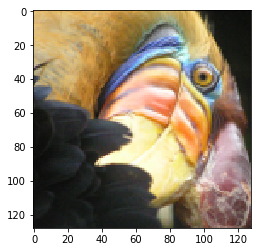

(128, 128, 3)
[[ 0.84313725  0.75294118  0.51764706]
 [ 0.90980392  0.80392157  0.48627451]
 [ 0.72156863  0.58431373  0.36470588]
 [ 0.77254902  0.59215686  0.30196078]
 [ 0.99215686  0.94117647  0.90980392]
 [ 0.69411765  0.48235294  0.21176471]
 [ 0.80392157  0.69019608  0.43529412]
 [ 0.68235294  0.60392157  0.45098039]
 [ 0.90588235  0.81960784  0.39215686]
 [ 0.17647059  0.16078431  0.16862745]
 [ 0.52156863  0.62745098  0.86666667]
 [ 0.69019608  0.62745098  0.46666667]
 [ 0.97647059  0.71764706  0.39607843]
 [ 0.0745098   0.09411765  0.07058824]
 [ 0.11372549  0.14901961  0.12941176]
 [ 0.9372549   0.64313725  0.42352941]]
K-Means iteration 1/10...

K-Means iteration 2/10...

K-Means iteration 3/10...

K-Means iteration 4/10...

K-Means iteration 5/10...

K-Means iteration 6/10...

K-Means iteration 7/10...

K-Means iteration 8/10...

K-Means iteration 9/10...

K-Means iteration 10/10...



In [72]:
from scipy.misc import imread
## ============= Part 4: K-Means Clustering on Pixels ===============
#  In this exercise, you will use K-Means to compress an image. To do this,
#  you will first run K-Means on the colors of the pixels in the image and
#  then you will map each pixel onto its closest centroid.
#  
#  You should now complete the code in kMeansInitCentroids.m
#

print('\nRunning K-Means clustering on pixels from an image.\n\n');

#  Load an image of a bird
#A = np.double(imread('bird_small.png'))
A = imread('bird_small.png')
plt.imshow(A)
plt.show()
#print(A)

# If imread does not work for you, you can try instead
#   load ('bird_small.mat');

A = A / 255; # Divide by 255 so that all values are in the range 0 - 1

# Size of the image
img_size = A.shape;
print(A.shape)

# Reshape the image into an Nx3 matrix where N = number of pixels.
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X that we will use K-Means on.
X = np.reshape(A, (img_size[0] * img_size[1], img_size[2]))

# Run your K-Means algorithm on this data
# You should try different values of K and max_iters here
K = 16; 
max_iters = 10;

# When using K-Means, it is important the initialize the centroids
# randomly. 
# You should complete the code in kMeansInitCentroids.m before proceeding
initial_centroids = kMeansInitCentroids(X, K);
print(initial_centroids)

# Run K-Means
centroids, idx = runkMeans(X, initial_centroids, max_iters)

# 5. 图像压缩


Applying K-Means to compress an image.




C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


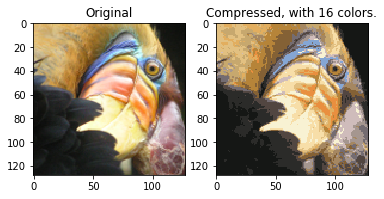

In [91]:
## ================= Part 5: Image Compression ======================
#  In this part of the exercise, you will use the clusters of K-Means to
#  compress an image. To do this, we first find the closest clusters for
#  each example. After that, we 

print('\nApplying K-Means to compress an image.\n\n');

# Find closest cluster members
# 最后一次迭代计算质心后没有标记过聚类
idx = findClosestCentroids(X, centroids);

# Essentially, now we have represented the image X as in terms of the
# indices in idx. 

# We can now recover the image from the indices (idx) by mapping each pixel
# (specified by its index in idx) to the centroid value
# 把X用它每行（每个点）对应的质心点映射成新的ndarray
X_recovered = centroids[idx,:] #16384*1*3

# Reshape the recovered image into proper dimensions
X_recovered = np.reshape(X_recovered, (img_size[0], img_size[1], img_size[2]))

# Display the original image 
plt.subplot(1, 2, 1);
plt.imshow(A); 
plt.title('Original');

# Display compressed image side by side
plt.subplot(1, 2, 2);
plt.imshow(X_recovered)
plt.title('Compressed, with %d colors.'%K)

plt.show()

如果K=24是什么效果


Running K-Means clustering on pixels from an image.




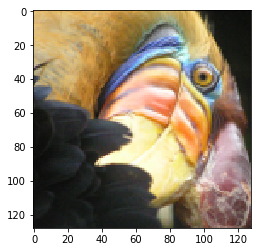

(128, 128, 3)
[[ 0.97647059  0.94117647  0.67058824]
 [ 0.69803922  0.6         0.49019608]
 [ 0.41568627  0.29411765  0.09803922]
 [ 0.78823529  0.78431373  0.76862745]
 [ 0.51372549  0.41960784  0.33333333]
 [ 0.77647059  0.61568627  0.30980392]
 [ 0.07058824  0.07058824  0.0627451 ]
 [ 0.51764706  0.43529412  0.42352941]
 [ 0.45882353  0.55294118  0.45098039]
 [ 0.71372549  0.64313725  0.49019608]
 [ 0.8745098   0.73333333  0.43529412]
 [ 0.72156863  0.65490196  0.47058824]
 [ 0.1254902   0.1254902   0.14117647]
 [ 0.91372549  0.74901961  0.62745098]
 [ 0.08627451  0.11372549  0.09019608]
 [ 0.78431373  0.61568627  0.30196078]
 [ 0.16470588  0.1254902   0.08627451]
 [ 0.76470588  0.65490196  0.38823529]
 [ 0.38039216  0.30980392  0.2627451 ]
 [ 0.08235294  0.10588235  0.10196078]
 [ 0.77254902  0.59215686  0.30196078]
 [ 0.12156863  0.11764706  0.12941176]
 [ 0.31764706  0.25490196  0.20784314]
 [ 0.05882353  0.07058824  0.05490196]]
K-Means iteration 1/10...

K-Means iteration 2/10

In [92]:
## ============= Part 4: K-Means Clustering on Pixels ===============
#  In this exercise, you will use K-Means to compress an image. To do this,
#  you will first run K-Means on the colors of the pixels in the image and
#  then you will map each pixel onto its closest centroid.
#  
#  You should now complete the code in kMeansInitCentroids.m
#

print('\nRunning K-Means clustering on pixels from an image.\n\n');

#  Load an image of a bird
#A = np.double(imread('bird_small.png'))
A = imread('bird_small.png')
plt.imshow(A)
plt.show()
#print(A)

# If imread does not work for you, you can try instead
#   load ('bird_small.mat');

A = A / 255; # Divide by 255 so that all values are in the range 0 - 1

# Size of the image
img_size = A.shape;
#print(A.shape)

# Reshape the image into an Nx3 matrix where N = number of pixels.
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X that we will use K-Means on.
X = np.reshape(A, (img_size[0] * img_size[1], img_size[2]))

# Run your K-Means algorithm on this data
# You should try different values of K and max_iters here
K = 24; 
max_iters = 10;

# When using K-Means, it is important the initialize the centroids
# randomly. 
# You should complete the code in kMeansInitCentroids.m before proceeding
initial_centroids = kMeansInitCentroids(X, K);
#print(initial_centroids)

# Run K-Means
centroids, idx = runkMeans(X, initial_centroids, max_iters)

print("runkMeans completed.")


Applying K-Means to compress an image.




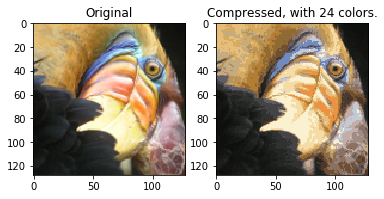

In [93]:
## ================= Part 5: Image Compression ======================
#  In this part of the exercise, you will use the clusters of K-Means to
#  compress an image. To do this, we first find the closest clusters for
#  each example. After that, we 

print('\nApplying K-Means to compress an image.\n\n');

# Find closest cluster members
# 最后一次迭代计算质心后没有标记过聚类
idx = findClosestCentroids(X, centroids);

# Essentially, now we have represented the image X as in terms of the
# indices in idx. 

# We can now recover the image from the indices (idx) by mapping each pixel
# (specified by its index in idx) to the centroid value
# 把X用它每行（每个点）对应的质心点映射成新的ndarray
X_recovered = centroids[idx,:] #16384*1*3

# Reshape the recovered image into proper dimensions
X_recovered = np.reshape(X_recovered, (img_size[0], img_size[1], img_size[2]))

# Display the original image 
plt.subplot(1, 2, 1);
plt.imshow(A); 
plt.title('Original');

# Display compressed image side by side
plt.subplot(1, 2, 2);
plt.imshow(X_recovered)
plt.title('Compressed, with %d colors.'%K)

plt.show()

K=256


Running K-Means clustering on pixels from an image.




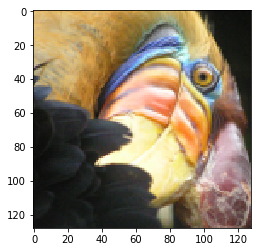

K-Means iteration 1/10...



C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:1110: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


K-Means iteration 2/10...

K-Means iteration 3/10...

K-Means iteration 4/10...

K-Means iteration 5/10...

K-Means iteration 6/10...

K-Means iteration 7/10...

K-Means iteration 8/10...

K-Means iteration 9/10...

K-Means iteration 10/10...

runkMeans completed.


In [94]:
print('\nRunning K-Means clustering on pixels from an image.\n\n');

#  Load an image of a bird
#A = np.double(imread('bird_small.png'))
A = imread('bird_small.png')
plt.imshow(A)
plt.show()
#print(A)

# If imread does not work for you, you can try instead
#   load ('bird_small.mat');

A = A / 255; # Divide by 255 so that all values are in the range 0 - 1

# Size of the image
img_size = A.shape;
#print(A.shape)

# Reshape the image into an Nx3 matrix where N = number of pixels.
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X that we will use K-Means on.
X = np.reshape(A, (img_size[0] * img_size[1], img_size[2]))

# Run your K-Means algorithm on this data
# You should try different values of K and max_iters here
K = 256; 
max_iters = 10;

# When using K-Means, it is important the initialize the centroids
# randomly. 
# You should complete the code in kMeansInitCentroids.m before proceeding
initial_centroids = kMeansInitCentroids(X, K);
#print(initial_centroids)

# Run K-Means
centroids, idx = runkMeans(X, initial_centroids, max_iters)

print("runkMeans completed.")


Applying K-Means to compress an image.




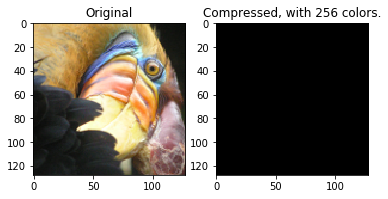

In [95]:
print('\nApplying K-Means to compress an image.\n\n');

# Find closest cluster members
# 最后一次迭代计算质心后没有标记过聚类
idx = findClosestCentroids(X, centroids);

# Essentially, now we have represented the image X as in terms of the
# indices in idx. 

# We can now recover the image from the indices (idx) by mapping each pixel
# (specified by its index in idx) to the centroid value
# 把X用它每行（每个点）对应的质心点映射成新的ndarray
X_recovered = centroids[idx,:] #16384*1*3

# Reshape the recovered image into proper dimensions
X_recovered = np.reshape(X_recovered, (img_size[0], img_size[1], img_size[2]))

# Display the original image 
plt.subplot(1, 2, 1);
plt.imshow(A); 
plt.title('Original');

# Display compressed image side by side
plt.subplot(1, 2, 2);
plt.imshow(X_recovered)
plt.title('Compressed, with %d colors.'%K)

plt.show()


Running K-Means clustering on pixels from an image.




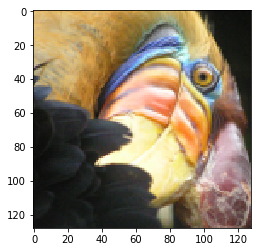

K-Means iteration 1/10...

K-Means iteration 2/10...

K-Means iteration 3/10...

K-Means iteration 4/10...



In [ ]:
print('\nRunning K-Means clustering on pixels from an image.\n\n');

#  Load an image of a bird
#A = np.double(imread('bird_small.png'))
A = imread('bird_small.png')
plt.imshow(A)
plt.show()
#print(A)

# If imread does not work for you, you can try instead
#   load ('bird_small.mat');

A = A / 255; # Divide by 255 so that all values are in the range 0 - 1

# Size of the image
img_size = A.shape;
#print(A.shape)

# Reshape the image into an Nx3 matrix where N = number of pixels.
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X that we will use K-Means on.
X = np.reshape(A, (img_size[0] * img_size[1], img_size[2]))

# Run your K-Means algorithm on this data
# You should try different values of K and max_iters here
K = 50; 
max_iters = 10;

# When using K-Means, it is important the initialize the centroids
# randomly. 
# You should complete the code in kMeansInitCentroids.m before proceeding
initial_centroids = kMeansInitCentroids(X, K);
#print(initial_centroids)

# Run K-Means
centroids, idx = runkMeans(X, initial_centroids, max_iters)

print("runkMeans completed.")